In [1]:
# Unzip the dataset files
!unzip /content/breast+cancer+wisconsin+diagnostic.zip

Archive:  /content/breast+cancer+wisconsin+diagnostic.zip
  inflating: wdbc.data               
  inflating: wdbc.names              


### Import all required libraries

In [1]:
# Data Loading and processing
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

### Data Loading & Processing

In [55]:
# Load data to dataframe
df = pd.read_csv("wdbc.data", header=None)

In [56]:
# Assign column names
df.columns = ['id', 'diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
    'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se','symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst','smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave_points_worst','symmetry_worst', 'fractal_dimension_worst']

In [57]:
# Frist 5 rows from dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Last 5 rows from dataset
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [6]:
# Drop ID column
df.drop('id', axis=1, inplace=True)

### Basic insights of data columns

In [7]:
# Basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
print("Dataset Shape:", df.shape)

Dataset Shape: (569, 31)


In [9]:
print("\nDiagnosis Value Counts:\n", df['diagnosis'].value_counts())


Diagnosis Value Counts:
 diagnosis
B    357
M    212
Name: count, dtype: int64


In [10]:
print("\nMissing Values:\n", df.isnull().sum().sum())


Missing Values:
 0


In [11]:
print("\nData Types:\n",df.dtypes.value_counts())


Data Types:
 float64    30
object      1
Name: count, dtype: int64


In [12]:
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Visualisations

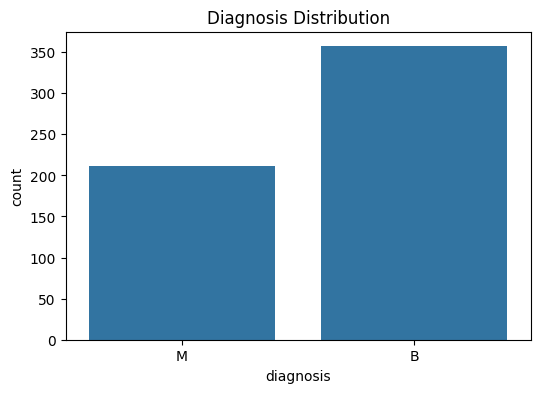

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title("Diagnosis Distribution")
plt.show()

In [14]:
# Encode target
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

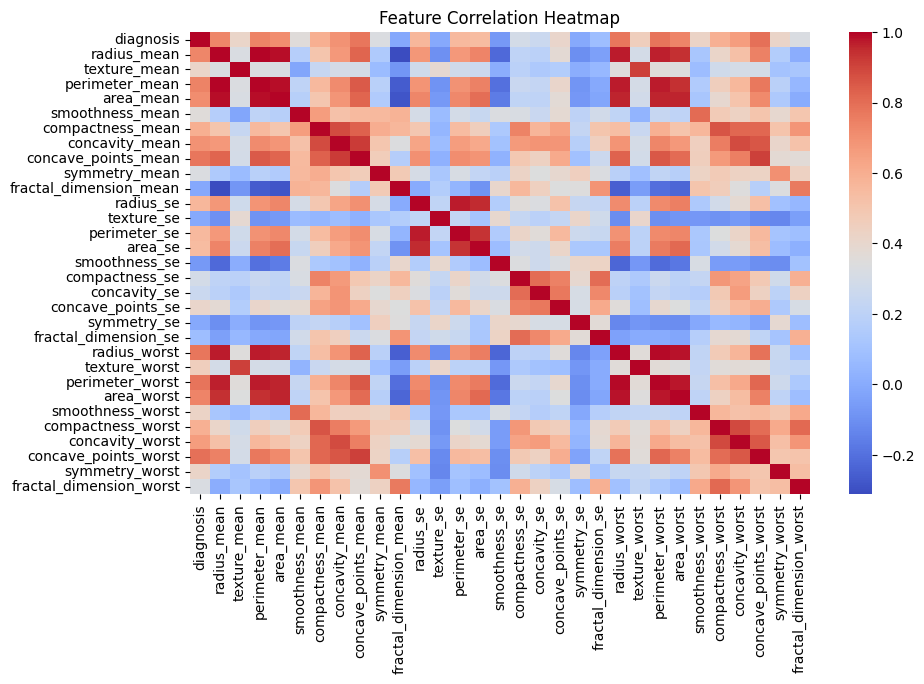

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

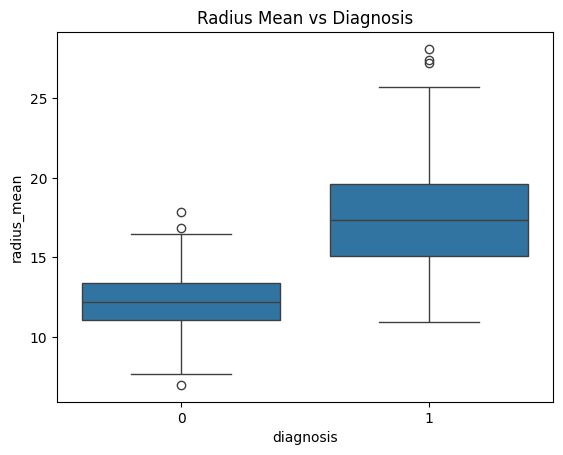

In [16]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title("Radius Mean vs Diagnosis")
plt.show()

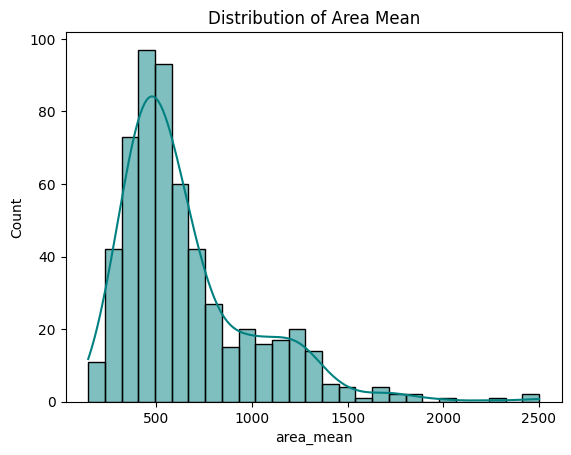

In [17]:
sns.histplot(df['area_mean'], kde=True, color='teal')
plt.title("Distribution of Area Mean")
plt.show()

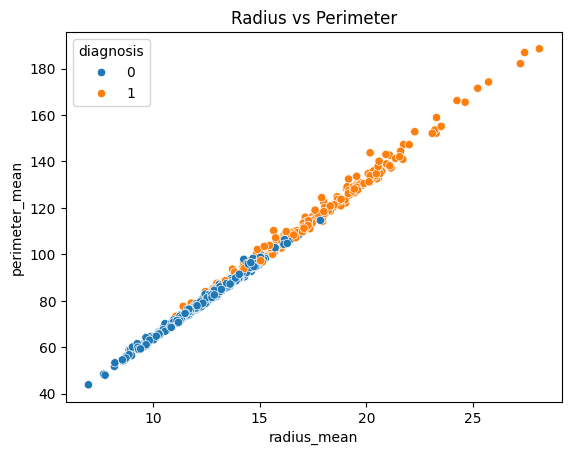

In [18]:
sns.scatterplot(x='radius_mean', y='perimeter_mean', hue='diagnosis', data=df)
plt.title("Radius vs Perimeter")
plt.show()

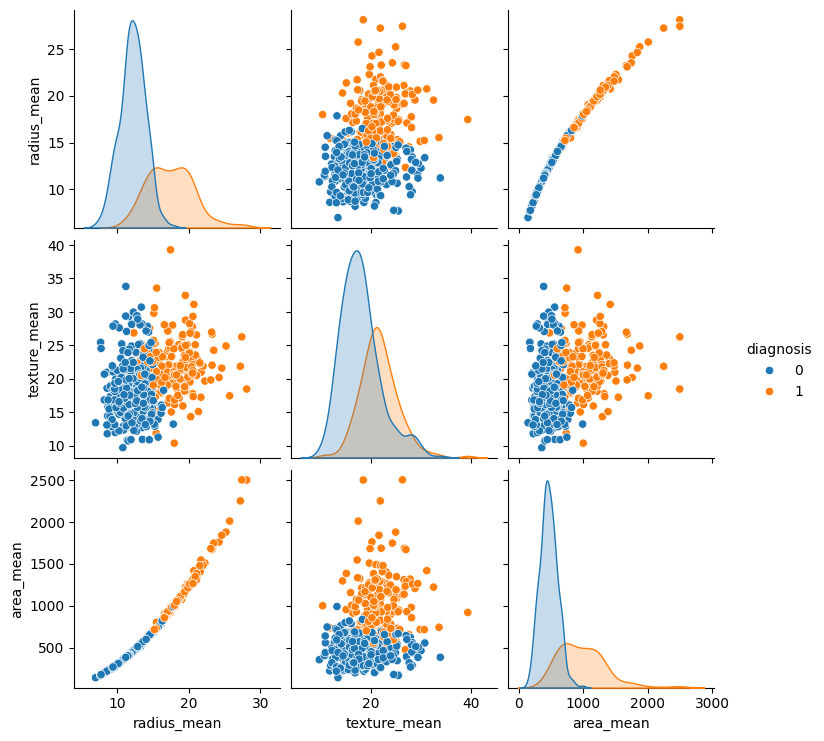

In [19]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'area_mean', 'diagnosis']], hue='diagnosis')
plt.show()

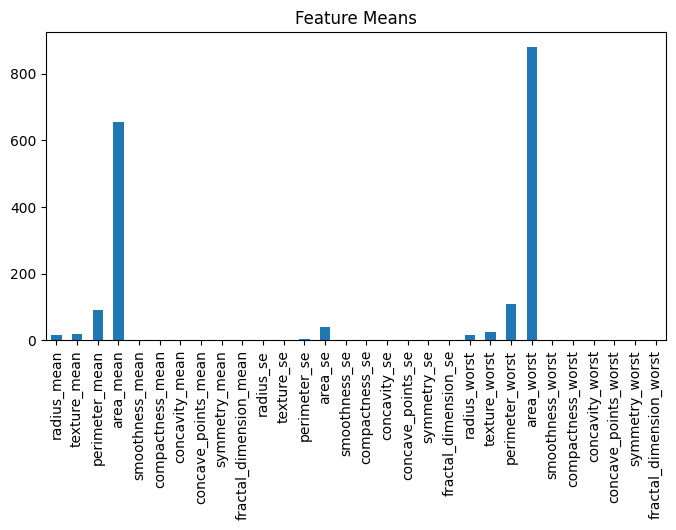

In [20]:
plt.figure(figsize=(8, 4))
df.drop('diagnosis', axis=1).mean().plot(kind='bar', title='Feature Means')
plt.xticks(rotation=90)
plt.show()

### Feature engineering

In [21]:
# Define Target and feature columns
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [22]:
# Scalling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Machine Learning Models

#### Model 1: Logistic Regression

In [24]:
# Load Model
lr = LogisticRegression()

In [25]:
# Fit training data to model
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Make Prediction
y_pred_lr = lr.predict(X_test)

In [27]:
# Model Evaluation
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy : ", acc_lr)

Logistic Regression Accuracy :  0.9736842105263158


In [28]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



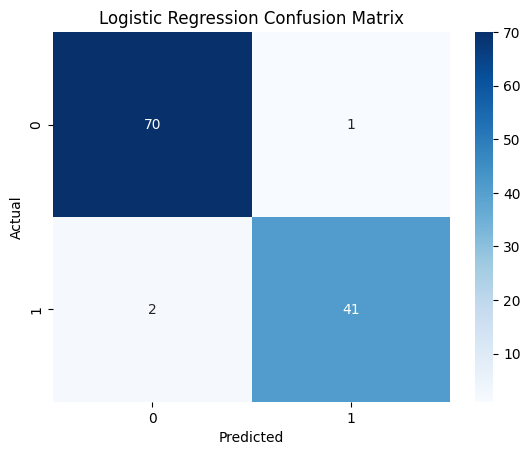

In [29]:
# Ploting confusion matrix
lr_cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#### Model 2: Decision Tree

In [30]:
# Load Model
dt = DecisionTreeClassifier(random_state=42)

In [31]:
# Fit training data to model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Make Prediction
y_pred_dt = dt.predict(X_test)

In [33]:
# Model Evaluation
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy : ", acc_dt)

Decision Tree Accuracy :  0.9473684210526315


In [34]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



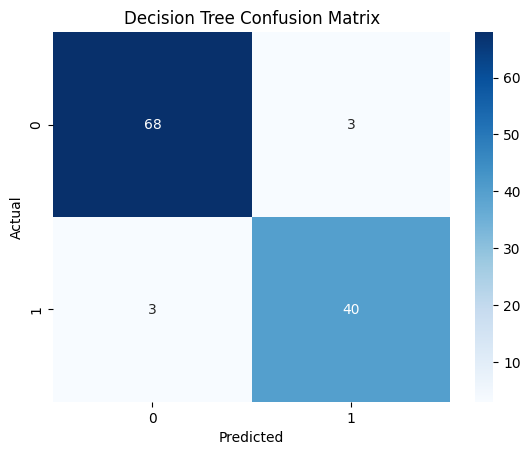

In [35]:
# Plotting confusion Matrix
dt_cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

#### Model 3: Random Forest

In [36]:
# Load Model
rf = RandomForestClassifier(random_state=42)

In [37]:
# Fit training data to model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Make Prediction
y_pred_rf = rf.predict(X_test)

In [39]:
# Model Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy : ", acc_rf)

Random Forest Accuracy :  0.9649122807017544


In [40]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



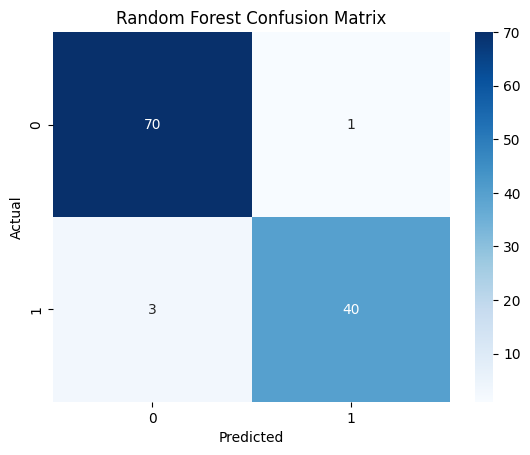

In [41]:
# Plotting Confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

#### Model 4: Support Vector Machine

In [42]:
# Load Model
svm = SVC()

In [43]:
# Fit training data to model
svm.fit(X_train, y_train)

SVC()

In [44]:
# Make Prediction
y_pred_svm = svm.predict(X_test)

In [45]:
# Model Evaluation
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy : ", acc_svm)

SVM Accuracy :  0.9736842105263158


In [46]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0.5, 1.0, 'SVM Confusion Matrix')

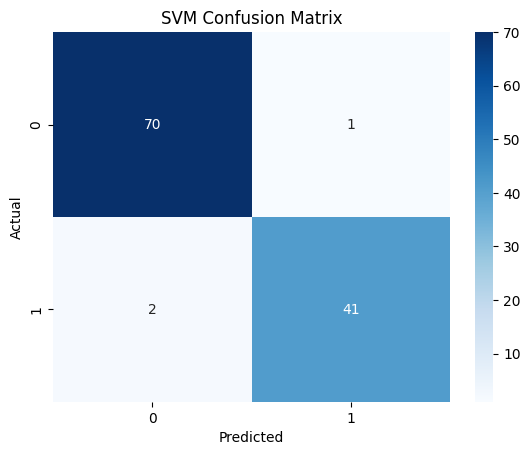

In [47]:
# Plotting Confusion matirx
svm_cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')

### Model comparison

In [58]:
print("\n Model Comparison")
print("Logistic Regression Accuracy:", acc_lr)
print("Decision Tree Accuracy:", acc_dt)
print("Random Forest Accuracy:", acc_rf)
print("SVM Accuracy:", acc_svm)


 Model Comparison
Logistic Regression Accuracy: 0.9736842105263158
Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544
SVM Accuracy: 0.9736842105263158


In [49]:
# Classification report for best model
print("\nClassification Report (Best Model - SVM):\n")
print(classification_report(y_test, y_pred_svm))


Classification Report (Best Model - SVM):

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



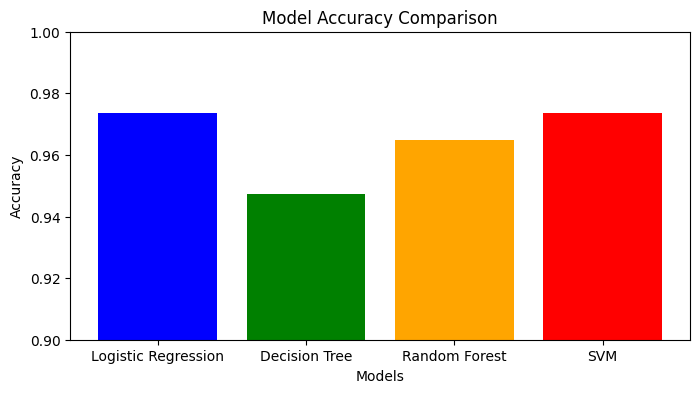

In [50]:
# Plotting accuray of all models
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [acc_lr, acc_dt, acc_rf, acc_svm]

plt.figure(figsize=(8, 4))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0.9, 1.0])
plt.show()

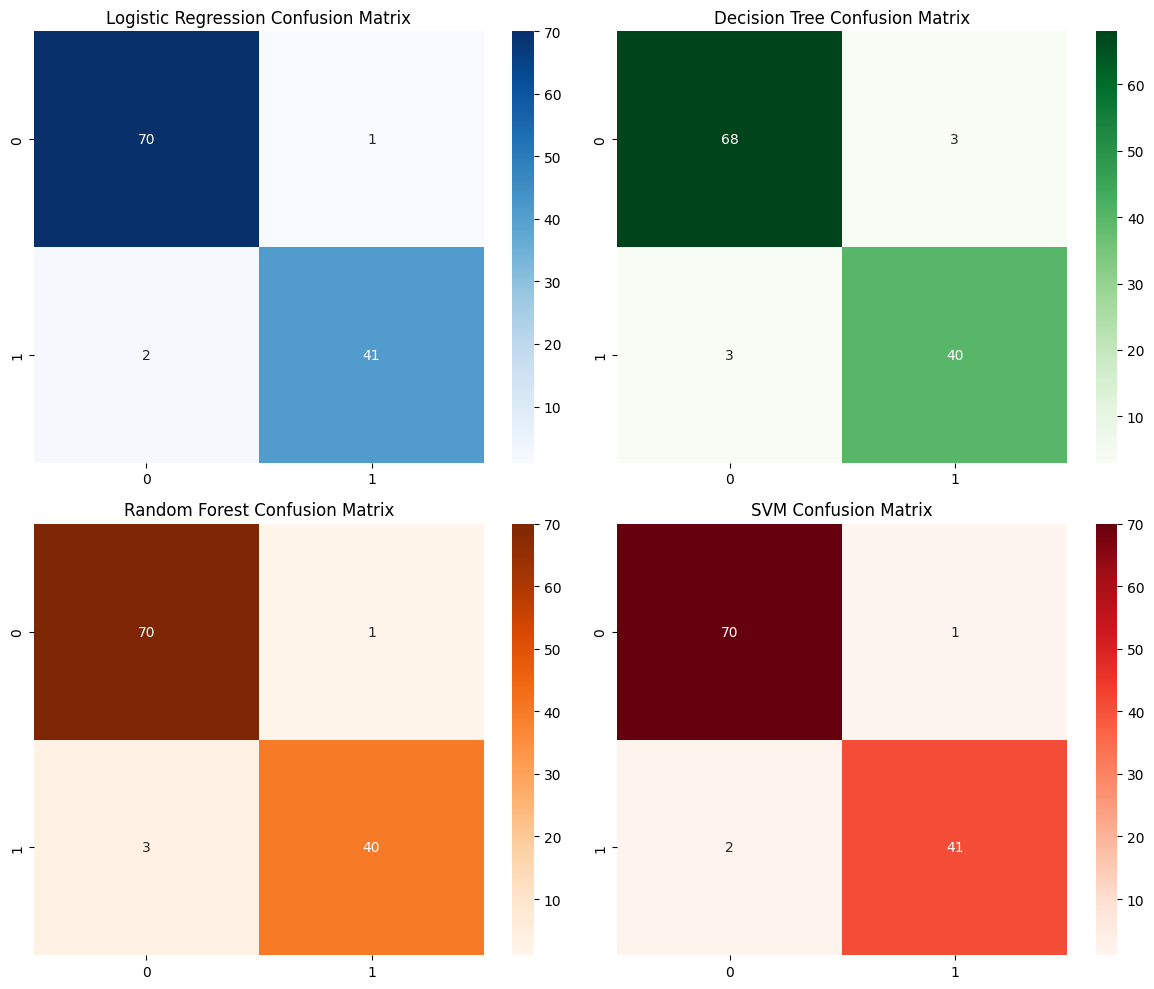

In [51]:
# Ploting all models confusion matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree Confusion Matrix')
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 0])
axes[1, 0].set_title('Random Forest Confusion Matrix')
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', ax=axes[1, 1])
axes[1, 1].set_title('SVM Confusion Matrix')
plt.tight_layout()
plt.show()

* Make prediction on new user input data

Using SVM Model

In [52]:
def predict_diagnosis(user_input):
    user_input_scaled = scaler.transform(np.array(user_input).reshape(1, -1))
    prediction = svm.predict(user_input_scaled)[0]
    if prediction == 1:
        diagnosis = "Malignant"
    else:
        diagnosis = "Benign"

    print(f"Predicted Diagnosis: {diagnosis}")

# Example usage
user_input = [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
             1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
              25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
predict_diagnosis(user_input)

Predicted Diagnosis: Malignant


Using logistic Regression model

In [53]:
def predict_diagnosis(user_input):
    # Preprocess user input
    user_input_scaled = scaler.transform(np.array(user_input).reshape(1, -1))

    # Use the Logistic Regression model for prediction
    prediction = lr.predict(user_input_scaled)[0]
    probability = lr.predict_proba(user_input_scaled)[0][1]

    if prediction == 1:
        diagnosis = "Malignant"
    else:
        diagnosis = "Benign"

    print(f"Predicted Diagnosis: {diagnosis}")
    print(f"Confidence Level: {probability:.2%}")

In [54]:
# Example usage
user_input = [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
             1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
              25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
predict_diagnosis(user_input)

Predicted Diagnosis: Malignant
Confidence Level: 100.00%
